## Preamble and simple classification

In [54]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

df = pd.read_csv('train1.csv')

X= df[['age', 'cost_of_ad','income','n_drivers','n_vehicles','prior_ins_tenure']]
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_prediction = [[34, 0.005133656, 40376, 1,3,7]]
print('Predicted fruit type for ', example_prediction, ' is ', 
      [knn.predict(example_prediction)[0]])

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.89
Predicted fruit type for  [[34, 0.005133656, 40376, 1, 3, 7]]  is  [0]


## K-Nearest Neighbors

Classification with some visualization

Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor



knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 0.   0.4  0.2 ...,  0.   0.   0. ]
R-squared test score: -0.176


## Linear models for regression¶

Linear  regression

In [56]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ -1.24e-04  -2.63e+01   6.36e-07   5.87e-02  -6.60e-02  -2.11e-03]
linear model intercept (b): 0.240
R-squared score (training): 0.051
R-squared score (test): 0.063


## Naive Bayes classifiers

In [57]:
nbclf = GaussianNB().fit(X_train, y_train)
print('train dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

train dataset
Accuracy of GaussianNB classifier on training set: 0.91
Accuracy of GaussianNB classifier on test set: 0.89


## Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_features = 5, random_state = 0)
clf.fit(X_train, y_train)

print('train dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

train dataset
Accuracy of RF classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.88


## Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Train dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Train dataset: decision tree
Accuracy of DT classifier on training set: 0.91
Accuracy of DT classifier on test set: 0.89


 ## Gradient-boosted decision trees 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)
print('train dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('train dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

train dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 0.91
Accuracy of GBDT classifier on test set: 0.89

train dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.91
Accuracy of GBDT classifier on test set: 0.89


## Kernelized Support Vector Machines

In [61]:
from sklearn.svm import SVC

clf = SVC(C=10).fit(X_train, y_train)
print('train  dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

train  dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.89


 ## Neural networks

<IPython.core.display.Javascript object>


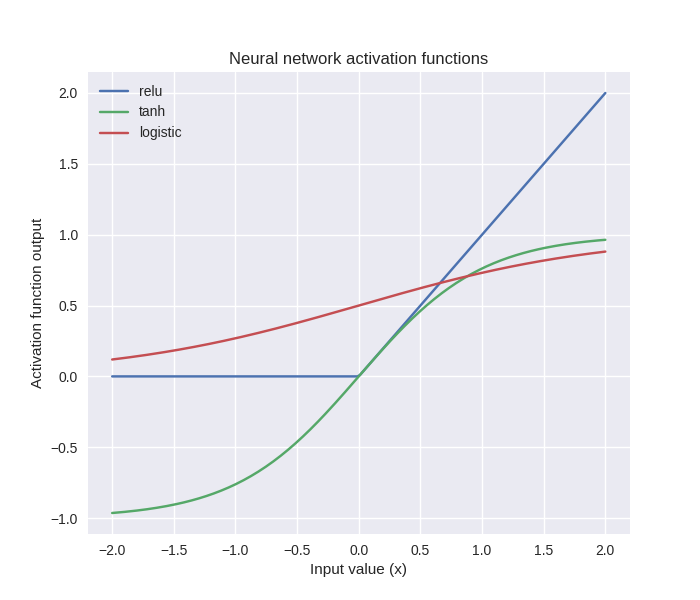

In [62]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler



clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Train dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Train dataset
Accuracy of NN classifier on training set: 0.91
Accuracy of NN classifier on test set: 0.89
